<a href="https://colab.research.google.com/github/hamzaktk18/stats/blob/main/Statitical_significance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set includes n= 857 for Logo and n=413 for NOL
- we can make both equal n = 857 or pick equal values n=350, but the goal is not to see who is giving more donations (since Logo n=857 is twice more than nol n=413), but to see the quality (amount) of the donation or as Dr. Volker put it, (x|x > 0).

In [ ]:
install.packages('rstatix')
install.packages('ggpubr')
install.packages('xlsx')
install.packages('coin')
install.packages('tibble')

In [ ]:
# required libraries for graphics and statistical analysis
library(tidyverse)
library(rstatix)
library(ggpubr)
library(xlsx)
library(tibble)

In [95]:
# Load and inspect the data
my_data <- read.xlsx("dataR-combined.xlsx", 1)
head(my_data, 3)

,group,amount
,<chr>,<dbl>
1,logo,40000
2,logo,30000
3,logo,10400


In [ ]:
# Load and inspect the data
columns_data <- read.xlsx("dataR - columns.xlsx", 1)
head(columns_data, 3)

In [ ]:
#visual inspection of data uploaded
print(my_data) #1270 values
print(columns_data) #857 and 413 values

In [7]:
# getting the count, mean, standard dev., median, and Interquartile range 
library(dplyr)
group_by(my_data, group) %>%
  summarise(
    count = n(),
    mean = mean(amount, na.rm = TRUE),
    sd = sd(amount, na.rm = TRUE),
    median = median(amount, na.rm = TRUE),
    IQR = IQR(amount, na.rm = TRUE)
  )

,group,count,mean,sd,median,IQR
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,logo,857,281.0512,1847.169,50,75
2,nol,413,353.6889,1684.156,100,150


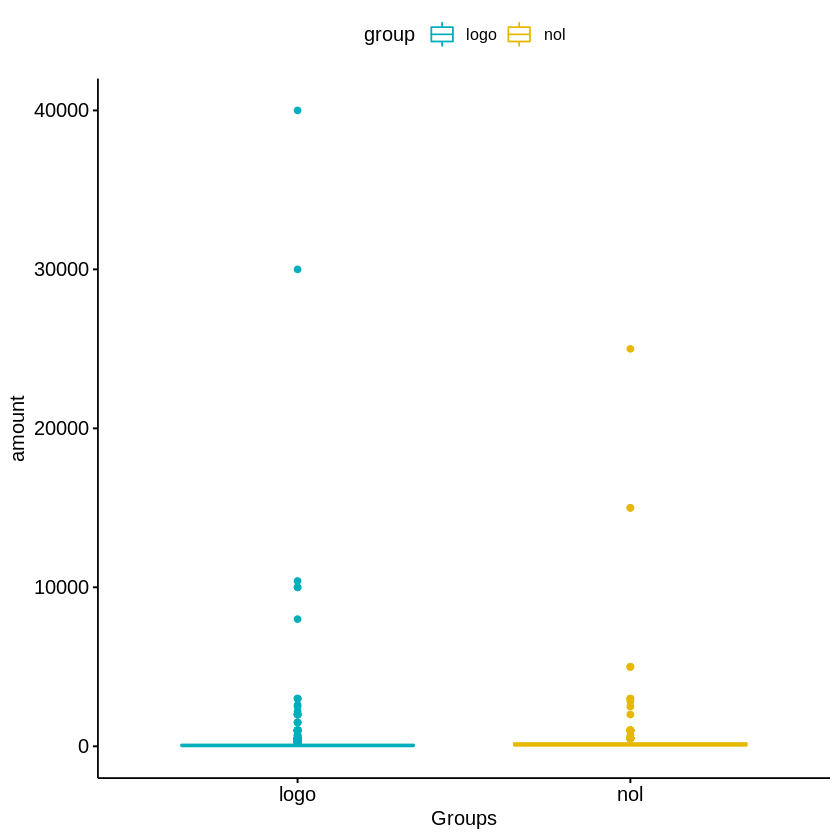

In [8]:
#plotting to check values 
#outliers identified 
library("ggpubr")
ggboxplot(my_data, x = "group", y = "amount", 
          color = "group", palette = c("#00AFBB", "#E7B800"),
        ylab = "amount", xlab = "Groups")

Visually inspecting, a quick way to remove outliers would be to remove the top 5 values in both datasets in order to perform testing

> outliers removed in the next section



In [ ]:
print(my_data) #combined dataset

In [ ]:
gghistogram(my_data, x = "amount", y = "..density..", 
            bins = 100, fill = "steelblue", add_density = TRUE)

In [ ]:
# Shapiro-Wilk normality test for logo
with(my_data, shapiro.test(amount[group == "logo"]))# p = 0.1
# Shapiro-Wilk normality test for nol
with(my_data, shapiro.test(amount[group == "nol"])) # p = 0.6

In [28]:
#columns to variables for later use in testing
x = columns_data$logo

y = columns_data$nol

In [17]:
#Performing the Wilcoxon Test 
res1 <- wilcox.test(amount ~ group, data = my_data, exact = FALSE)
res1


	Wilcoxon rank sum test with continuity correction

data:  amount by group
W = 148073, p-value = 1.724e-06
alternative hypothesis: true location shift is not equal to 0


In [15]:
# Print the p-value only
res1$p.value

[1] 1.72406e-06

In [21]:
wilcox.test(amount ~ group, data = my_data, exact = FALSE, alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  amount by group
W = 148073, p-value = 8.62e-07
alternative hypothesis: true location shift is less than 0


The p-value of the test is 1.72406041421611e-06, which is less than the significance level alpha = 0.05. We can conclude that logo’s median amount is significantly different from nol's median with a p-value = 1.72406041421611e-06.
However, NOL median is greater than Logo median because median is based on the middle values (in ascending order) and NOL has a smaller n which means more zeroes were omitted compared to Logo.  

In [45]:
# #making y equal in count to x and naming it my_data_yalt
# my_data_yalt <- read.xlsx("dataR - columns.xlsx", 1, na = "0")
# head(columns_data, 3)


----------------------------------------------------------------------------------------------------------------------------------------------------------------

Now we test after we remove outliers (newdata)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [107]:
#remove top 6 values from both datasets (12 altogether) #count 1258
dataset= my_data
dataset = (dataset[ -c(1:6, 858:863),])


In [ ]:
print(dataset)

In [109]:
# getting the count, mean, standard dev., median, and Interquartile range 
library(dplyr)
group_by(dataset, group) %>%
  summarise(
    count = n(),
    mean = mean(amount, na.rm = TRUE),
    sd = sd(amount, na.rm = TRUE),
    median = median(amount, na.rm = TRUE),
    IQR = IQR(amount, na.rm = TRUE)
  )

,group,count,mean,sd,median,IQR
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,logo,851,155.6532,335.3936,50,75
2,nol,407,186.9129,371.5048,100,150


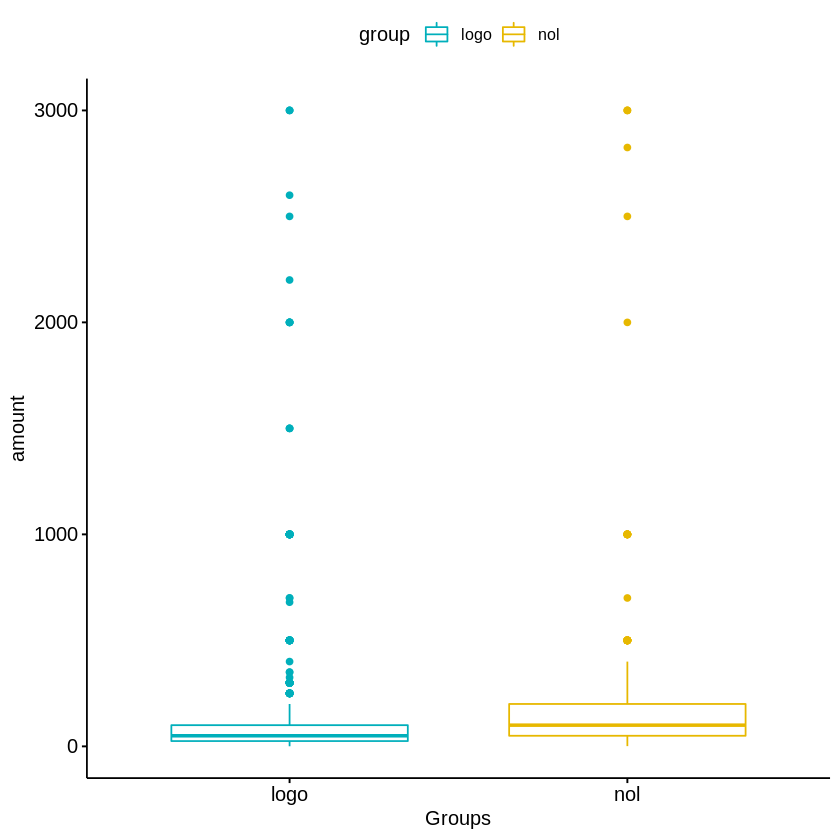

In [110]:
#plotting to check values 
#outliers identified 
library("ggpubr")
ggboxplot(dataset, x = "group", y = "amount", 
          color = "group", palette = c("#00AFBB", "#E7B800"),
        ylab = "amount", xlab = "Groups")

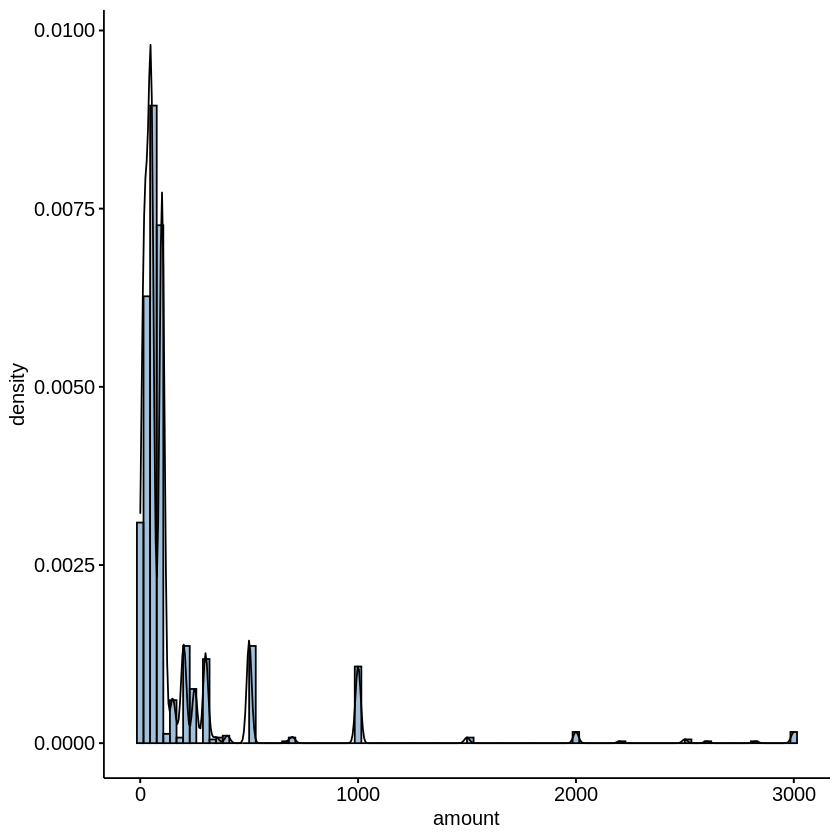

In [111]:
gghistogram(dataset, x = "amount", y = "..density..", 
            bins = 100, fill = "steelblue", add_density = TRUE)

In [112]:
# Shapiro-Wilk normality test for logo
with(dataset, shapiro.test(amount[group == "logo"]))# p = 0.1
# Shapiro-Wilk normality test for nol
with(dataset, shapiro.test(amount[group == "nol"])) # p = 0.6


	Shapiro-Wilk normality test

data:  amount[group == "logo"]
W = 0.41323, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  amount[group == "nol"]
W = 0.42305, p-value < 2.2e-16


In [116]:
#running Wilcoxon test after removing outliers
res3 <- wilcox.test(amount ~ group, data = dataset,
                   exact = FALSE)
res3


	Wilcoxon rank sum test with continuity correction

data:  amount by group
W = 145607, p-value = 3.53e-06
alternative hypothesis: true location shift is not equal to 0


In [117]:
# Print the p-value only
res3$p.value

[1] 3.529926e-06

our P value is 0.00000353, which is less than our alpha = 0.05 threshold. Reject Null hypothesis.

if you want to test your dataset please visit this online calculator: http://www.sthda.com/english/rsthda/unpaired-wilcoxon.php (independent 2 sample Wilcoxon test)
When do we use Wilcoxon test? 
  - The Wilcoxon rank-sum test is commonly used for the comparison of two groups of nonparametric (interval or not normally distributed) data, such as those which are not measured exactly but rather as falling within certain limits.

------------------------------------------------------------------------------------------------------------------------------------------------------------------

                                      *Lets try T.test and F.test*

assumptions for T-tests:
  - independent data of samples
  - equal spread of data (both samples)
  - normal distribution (both samples)

In [119]:
#To find P-value of F-test
res.ftest <- var.test(amount ~ group, data = my_data, alternative = "two.sided")
res.ftest #going back to grouping mydata instead of columns data


	F test to compare two variances

data:  amount by group
F = 1.203, num df = 856, denom df = 412, p-value = 0.03206
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.016063 1.417240
sample estimates:
ratio of variances 
          1.202953 


------------------------------------------------------------------------------------------------------------

Our Hypothesis for the F-tests are:
  - The standard two-tailed two-sample variance tests use the following hypotheses:

H0: Null: The two population variances are equal.
H1: Alternative: The two population variances are not equal.

Conclusion for F-test
 * The p-value of F-test is p = 0.01496, It’s lower than the significance level alpha = 0.05 so we can reject the null hypothesis. The difference between the two variances is statistically significant.

-------------------------------------------------------------------------------------------------

In [120]:
# Compute t-test
res4 <- t.test(x, y, var.equal = FALSE)
res4


	Welch Two Sample t-test

data:  x and y
t = -0.69737, df = 885, p-value = 0.4858
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -277.0654  131.7899
sample estimates:
mean of x mean of y 
 281.0512  353.6889 


In [122]:
#if x = logo included is greater than nol
t.test(amount ~ group, data = my_data,
        var.equal = TRUE, alternative = "greater")


	Two Sample t-test

data:  amount by group
t = -0.67525, df = 1268, p-value = 0.7502
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -249.7079       Inf
sample estimates:
mean in group logo  mean in group nol 
          281.0512           353.6889 


Conclusion for T test:
  

*   p-value = 0.4858
*   The p-value of the test is 0.4858, which is more than the significance level alpha = 0.05. We can conclude that logo average is not significantly different from nol average.


  

```what the difference between t-test and f-test?```
- t-test is used to test if two sample have the same mean. The assumptions are that they are samples from normal distribution. f-test is used to test if two sample have the same variance.

- check this resrouce to undertstand the difference:
https://keydifferences.com/difference-between-t-test-and-f-test.html


----------------------------------------------------------------------------------------------------------------------------------------------------------------

Lets test for z - test to check proportions (even though we undertsand that logo n=857 and nol n=416)

In [134]:
#We want to know, whether the proportions of donars in logo are the same in the two groups of individuals?
res5 <- prop.test(x = c(857, 413), n = c(14209, 14206), correct = FALSE, alternative = "greater")
# Printing the results
res5 


	2-sample test for equality of proportions without continuity
	correction

data:  c(857, 413) out of c(14209, 14206)
X-squared = 162.39, df = 1, p-value < 2.2e-16
alternative hypothesis: greater
95 percent confidence interval:
 0.02722077 1.00000000
sample estimates:
    prop 1     prop 2 
0.06031389 0.02907222 


Conclusion for Z-test:
  - The p-value of the test is 2.2e-16, which is less than the significance level alpha = 0.05. We can conclude that the proportion of donors is significantly different in the two groups with a p-value = 2.2e-16.



---



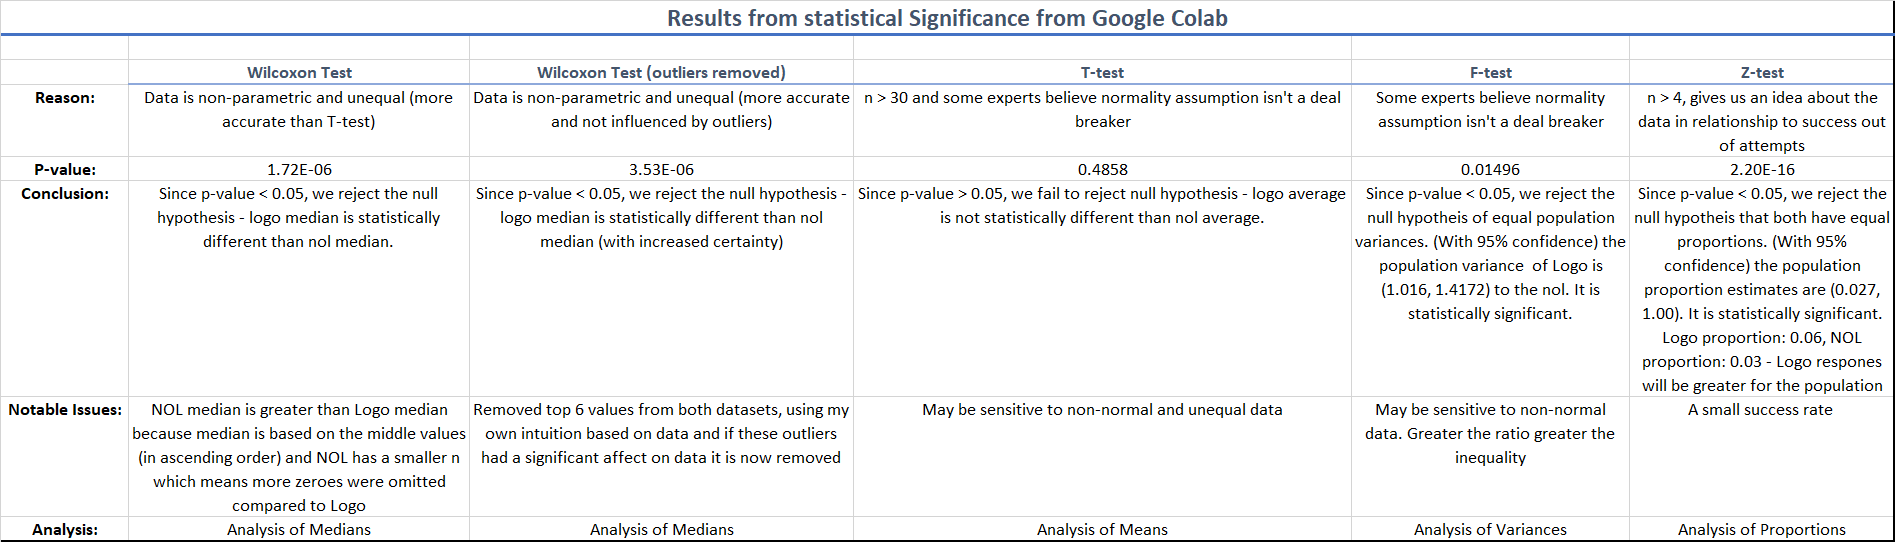